In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [20]:
def plot_snake(data, variable="snake_length"):

    plt.figure(figsize=(10, 6))
    plt.plot(data['episode'], data[variable], color='b', label="Longueur du serpent")

    plt.xlabel("Episode")
    plt.ylabel("Longueur du serpent")
    plt.title("Évolution de la longueur du serpent au fil des épisodes")
    plt.legend()

    plt.grid(True)
    plt.show()

def mean_steps(df, step=1000):
    df['group'] = df['episode'] // step
    df_mean = df.groupby('group').mean()

    return df_mean

In [24]:

titre = "Évolution de la longueur du serpent au fil des épisodes"
ylabel = "Longueur du serpent"
def plot_all_snakes(data_list, titre=titre, ylabel=ylabel, variable="snake_length", labels=None, colors=None, legend=False, **kwargs):
    """
    Trace l'évolution de la longueur du serpent pour plusieurs datasets sur le même graphique.
    
    Parameters:
    - data_list: Liste de DataFrames contenant les données à tracer.
    - variable: Le nom de la colonne à tracer (par défaut "snake_length").
    - labels: Liste de labels à attribuer à chaque dataset (par défaut None).
    - colors: Liste de couleurs à utiliser pour chaque courbe (par défaut None).
    - legend: Boolean pour n'afficher que la légende si True (par défaut False).
    - **kwargs: Arguments supplémentaires à passer à plt.plot (par exemple, linestyle, marker, etc.).
    """
    plt.figure(figsize=(10, 6))

    # Si aucun label n'est fourni, on utilise des labels génériques.
    if labels is None:
        labels = [f"Dataset {i+1}" for i in range(len(data_list))]
    
    # Si aucune couleur n'est fournie, on génère une palette de couleurs par défaut.
    if colors is None:
        colors = plt.cm.tab10.colors[:len(data_list)]  # Utilise une palette de couleurs

    # Si legend=True, on ne dessine pas les courbes, seulement la légende
    if legend:
        # Création de "faux" tracés invisibles juste pour la légende
        for i in range(len(data_list)):
            plt.plot([], [], label=labels[i], color=colors[i], **kwargs)
        plt.legend(loc="upper center",  ncol=2)
        plt.axis('off')  # Cacher les axes pour n'afficher que la légende
    else:
        # Tracer chaque dataset normalement
        for i, data in enumerate(data_list):
            plt.plot(data['episode'], data[variable], label=labels[i], color=colors[i], **kwargs)

        # Ajouter les titres et labels
        plt.xlabel("Episode")
        plt.ylabel(ylabel)
        plt.title(titre)
        
        # Afficher la légende en dehors du graphique
        plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
        
        # Ajuster la mise en page pour éviter les chevauchements
        plt.tight_layout(rect=[0, 0, 0.85, 1])  # Ajuste la taille du graphique pour laisser de l'espace à droite  

        # Afficher une grille
        plt.grid(True)
    
    # Afficher le graphique ou la légende seule
    plt.show()




def load_csv(folder_path):
    dataframes = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            dataframes.append(df)
    
    return dataframes




In [4]:
def add_var(dataframes):
    """
    Ajoute une colonne 'snake_length_steps' (résultat de la division 'snake_length' / 'steps')
    à chaque DataFrame dans une liste de DataFrames.
    
    Parameters:
        dataframes (list of pd.DataFrame): Liste de DataFrames à modifier.

    Returns:
        list of pd.DataFrame: Liste de DataFrames modifiés.
    """
    modified_dataframes = []
    
    for df in dataframes:
        if 'snake_length' in df.columns and 'steps' in df.columns:
            df['snake_length_steps'] = df['snake_length'] / df['steps'].replace(0, pd.NA)
        else:
            print("Les colonnes 'snake_length' et/ou 'steps' sont manquantes dans un DataFrame.")
        
        modified_dataframes.append(df)
    
    return modified_dataframes


In [29]:
def decode_file(filename: str) -> str:

    decoded_filename = filename.split(".")[0]
    decoded_filename = decoded_filename.replace("f", ".")
    
    params = decoded_filename.split("_")
    
    if len(params) == 10:
        epsilon, alpha, gamma, apple_eaten, vacant, hurdle, inverse, const_step_size, large_key, kick_hurdle = params
        return f"""
        EPSILON: {epsilon}
        ALPHA: {alpha}
        GAMMA: {gamma}
        APPLE_EATEN: {apple_eaten}
        VACANT: {vacant}
        HURDLE: {hurdle}
        INVERSE: {inverse}
        LARGE_KEY: {large_key}
        CONST_STEP_SIZE: {const_step_size}
        KICK_HURDLE: {kick_hurdle}
        """
    elif len(params) == 9:
        epsilon, gamma, apple_eaten, vacant, hurdle, inverse, const_step_size, large_key, kick_hurdle = params
        return f"""
        EPSILON: {epsilon}
        GAMMA: {gamma}
        APPLE_EATEN: {apple_eaten}
        VACANT: {vacant}
        HURDLE: {hurdle}
        INVERSE: {inverse}
        LARGE_KEY: {large_key}
        CONST_STEP_SIZE: {const_step_size}
        KICK_HURDLE: {kick_hurdle}
        """
    else:
        return "Le format du nom de fichier est invalide."
    
def load_names(folder_path):
    dataframes = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            dataframes.append(filename)
    
    return dataframes


In [33]:
names = load_names("data")
complete_name = [f"Dataset {i+1}:\n" + decode_file(name) for i, name in enumerate(names)]

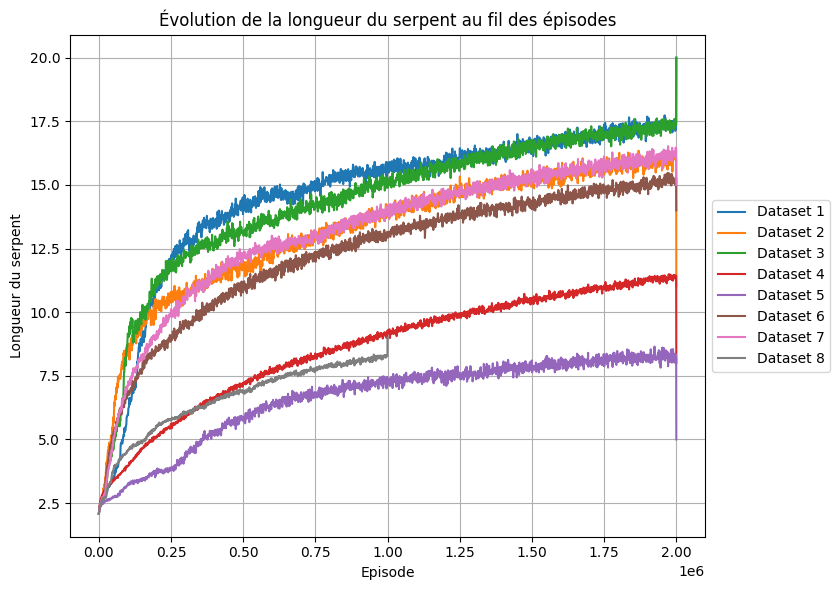

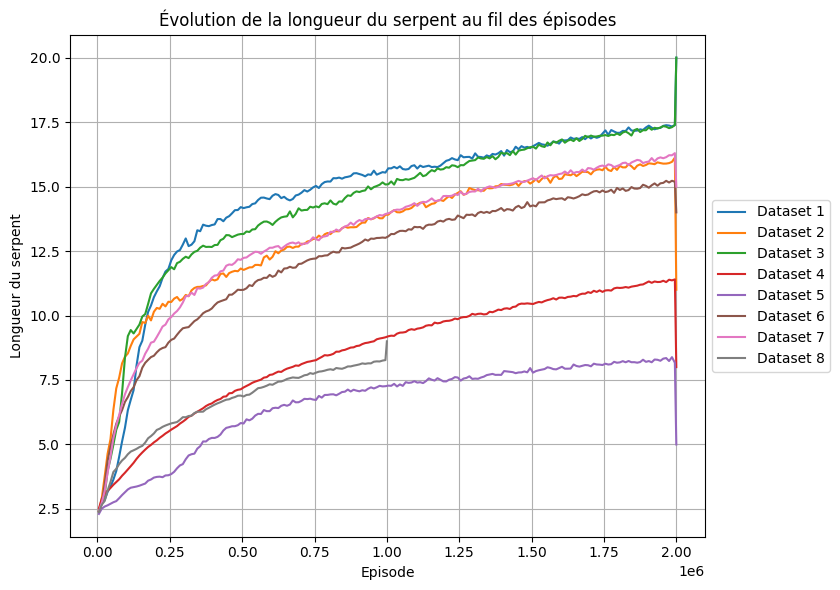

In [26]:
datas = load_csv("data")
datas = add_var(datas)
datas_mean_1000 = [mean_steps(df) for df in datas]
datas_mean_10000 = [mean_steps(df, step=10000) for df in datas]

#plot_all_snakes(data_list=datas)
plot_all_snakes(data_list=datas_mean_1000)
plot_all_snakes(data_list=datas_mean_10000)

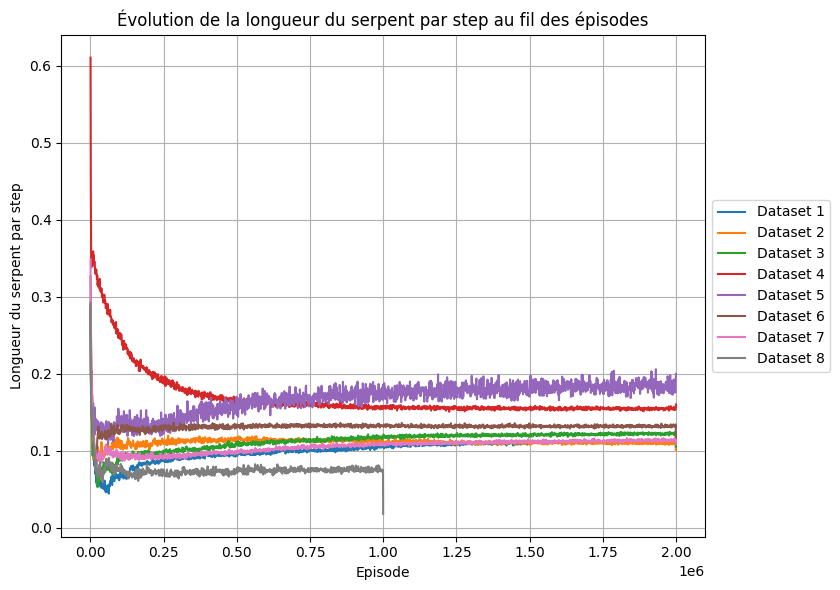

In [25]:
titre = "Évolution de la longueur du serpent par step au fil des épisodes"
ylabel = "Longueur du serpent par step"

plot_all_snakes(data_list=datas_mean_1000, variable='snake_length_steps', titre=titre, ylabel=ylabel)

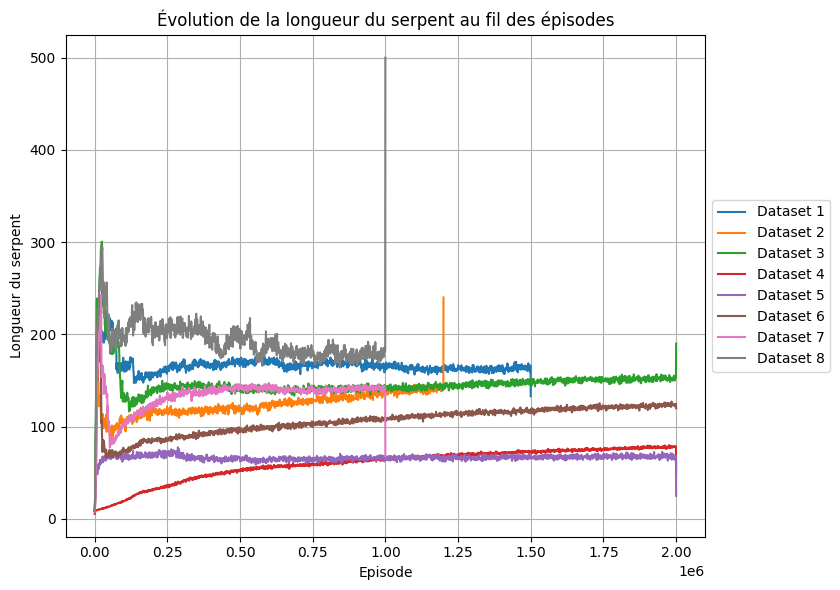

In [ ]:
#plot_all_snakes(data_list=datas, variable='steps')
plot_all_snakes(data_list=datas_mean_1000, variable='steps')

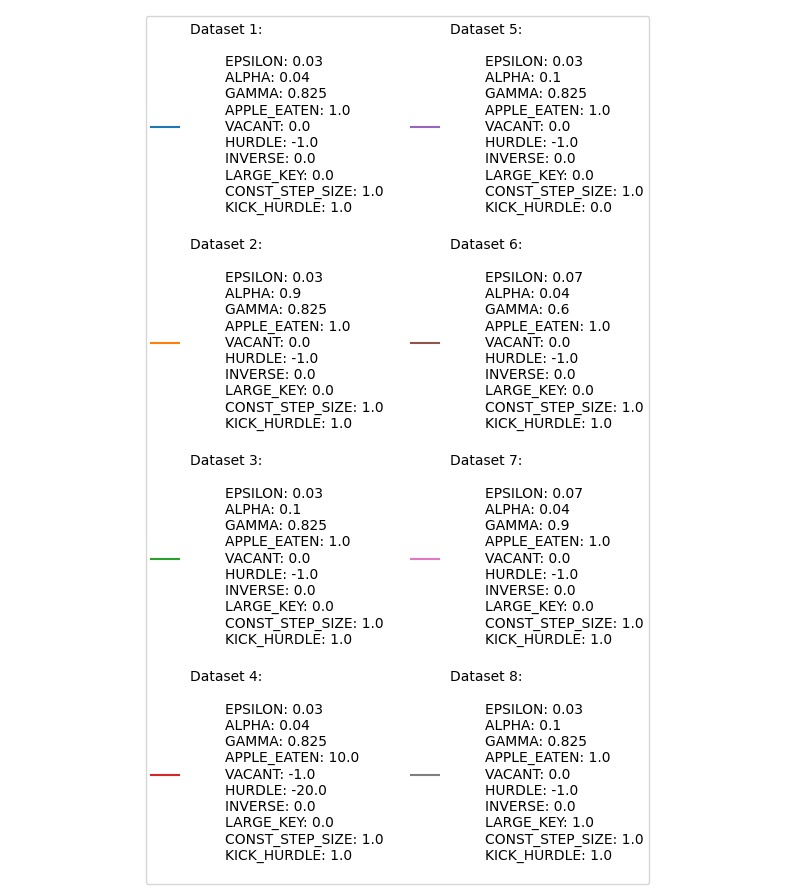

In [34]:
plot_all_snakes(data_list=datas_mean_1000, labels=complete_name, legend=True)